In [18]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pathlib import Path

pd.set_option("display.max_columns", 500)

np.random.seed(2137) 


In [20]:
#df = pd.read_csv('appartments_train.csv', index_col = 'unit_id')
df = pd.read_csv('appartments_train.csv', index_col = 'unit_id')
df.index.name = None

In [21]:
df.sample(10)

,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,dist_kind,dist_rest,dist_uni,dist_pharma,own_type,build_mat,cond_class,has_park,has_balcony,has_lift,has_sec,has_store,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,green_space_ratio,estimated_maintenance_cost,global_economic_index
78a1de0708226437,NaN,48.83,2.0,1.0,3.0,1998.0,7.846,11.0,0.234,0.171,0.623,0.222,0.629,1.739,0.101,12631efb,7ceffe3b,53cced8d,yes,yes,no,no,yes,704287.28,2024-03,693f303c,800711.71,32.67,48.48,62.38,0.999,9.04,105.668549
115a285f1e8bbc20,0d6c4dfc,35.53,2.0,3.0,4.0,1970.0,3.960,8.0,0.294,2.154,0.848,0.286,0.268,0.316,0.255,12631efb,7f8c00f9,53cced8d,no,no,no,no,yes,313238.60,2023-08,8d5a4f0c,258100.50,37.87,26.23,48.00,1.000,3.88,104.927936
a76803b46f21fb29,0d6c4dfc,25.87,2.0,3.0,4.0,1963.0,6.563,23.0,0.267,0.552,0.074,0.329,0.090,1.316,0.061,12631efb,7ceffe3b,NaN,no,yes,no,no,yes,493304.86,2024-04,e0cff11b,409311.56,75.92,17.89,50.33,0.999,12.23,90.167666
6424c0db2a193b6b,0d6c4dfc,58.98,3.0,NaN,3.0,2022.0,4.714,10.0,0.317,2.250,1.087,0.264,0.152,2.146,0.569,12631efb,7ceffe3b,NaN,no,yes,yes,no,no,1991412.59,2023-10,693f303c,2008616.80,1.00,3.01,38.72,1.000,23.90,94.343251
390664e65d2bd159,0c238f18,51.72,2.0,3.0,3.0,NaN,0.593,121.0,0.016,0.108,0.258,0.100,0.026,0.111,0.023,12631efb,7ceffe3b,NaN,no,no,no,no,no,583340.31,2023-08,0ab06839,497593.97,NaN,92.23,35.79,1.000,9.70,104.708779
467a68c5b1e2a638,0c238f18,44.99,2.0,3.0,6.0,1961.0,1.315,81.0,0.133,0.535,0.173,0.425,0.015,0.305,0.452,12631efb,7ceffe3b,a2881958,no,no,yes,no,no,696695.01,2023-11,693f303c,760572.57,78.62,54.11,69.87,1.000,6.46,95.629116
223961fb32c9f378,2a6d5c01,55.91,3.0,5.0,6.0,2023.0,0.251,98.0,0.495,0.728,0.312,0.265,0.040,0.946,0.249,12631efb,7ceffe3b,NaN,no,no,yes,no,no,1372652.41,2024-06,e0cff11b,1552494.92,1.30,53.47,69.91,1.000,7.97,107.830152
d405785608a95062,0d6c4dfc,75.11,4.0,3.0,3.0,2011.0,16.980,2.0,0.758,NaN,0.720,0.273,0.364,NaN,0.686,12631efb,7ceffe3b,a2881958,no,yes,no,yes,no,520878.21,2023-08,693f303c,522689.71,8.24,94.83,64.45,0.998,24.96,105.255044
531952a298de2f42,0d6c4dfc,35.35,1.0,NaN,3.0,1965.0,1.664,9.0,0.278,0.783,0.223,0.778,0.468,1.633,0.381,12631efb,NaN,NaN,no,no,no,no,yes,373127.46,2024-01,e0cff11b,381721.48,81.90,2.16,55.92,1.000,6.67,92.882208
cd4b403eca3297f4,2a6d5c01,77.95,4.0,10.0,12.0,2020.0,4.882,17.0,0.355,0.112,0.135,0.322,0.266,2.365,0.062,12631efb,7ceffe3b,NaN,no,no,yes,no,no,1689740.47,2023-12,693f303c,1812499.92,2.06,20.78,44.19,1.000,14.79,93.899531


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156454 entries, a3a463617a5c0439 to 53618f0f04ae1dbd
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   obj_type                    122634 non-null  object 
 1   dim_m2                      156454 non-null  float64
 2   n_rooms                     156454 non-null  float64
 3   floor_no                    128756 non-null  float64
 4   floor_max                   154533 non-null  float64
 5   year_built                  130741 non-null  float64
 6   dist_centre                 156454 non-null  float64
 7   n_poi                       156454 non-null  float64
 8   dist_sch                    156324 non-null  float64
 9   dist_clinic                 155883 non-null  float64
 10  dist_post                   156266 non-null  float64
 11  dist_kind                   156291 non-null  float64
 12  dist_rest                   156063 non-null  float64

In [23]:
missing_percent = (df.isna().sum() / len(df) * 100).round(2)
print(missing_percent)

obj_type                      21.62
dim_m2                         0.00
n_rooms                        0.00
floor_no                      17.70
floor_max                      1.23
year_built                    16.43
dist_centre                    0.00
n_poi                          0.00
dist_sch                       0.08
dist_clinic                    0.36
dist_post                      0.12
dist_kind                      0.10
dist_rest                      0.25
dist_uni                       2.76
dist_pharma                    0.14
own_type                       0.00
build_mat                     39.63
cond_class                    74.82
has_park                       0.00
has_balcony                    0.00
has_lift                       4.94
has_sec                        0.00
has_store                      0.00
price_z                        0.00
src_month                      0.00
loc_code                       0.00
market_volatility              0.00
infrastructure_quality      

variable "cond_class" has over 70% of NAs - I will delete it. When it comes to others, I'll manage it other ways :p
same for "build_mat" - nearly 40% miss and its anonymized - no point in keeping

what's more, "green_space_ratio" is almost constant variable. It doesnt give new information. Will drop it also

In [24]:
df = df.drop(columns=['cond_class', 'build_mat', 'green_space_ratio'])

Dealing with NAs

In [25]:
# setting "obj_type" to 'other" if its missing
df['obj_type'] = df['obj_type'].fillna('other')

# using median value (4) for max floor if its missing
df['floor_max'] = df['floor_max'].fillna(4)

# if there is no floor, choose mid of the building
df['floor_no'] = df['floor_no'].fillna(df['floor_max']/2)

# when it comes to year I'll choose mid value between mean and median - 1990
df['year_built'] = df['year_built'].fillna(1990)

# for all distances I'll use the average of mean and median
dist_columns = ['dist_centre', 'dist_sch','dist_clinic','dist_post', 'dist_kind',
                'dist_rest', 'dist_uni', 'dist_pharma']

for col in dist_columns:
    avg_mean_median = (df[col].mean() + df[col].median()) / 2
    df[col] = df[col].fillna(avg_mean_median)

# managing all "has.." variables. If null happens - we will code it as "no". Then change into boolean
has_columns = ['has_park', 'has_balcony', 'has_lift', 'has_sec', 'has_store']

for col in has_columns:
    df[col] = df[col].fillna('no')
    df[col] = df[col].map({'no':0, 'yes':1})


# dealing with other measures. If NA happen, I will use average of mean and median (to mitigate outliers). 

other_measures = ['market_volatility', 'infrastructure_quality', 'neighborhood_crime_rate', 'popularity_index',
                'estimated_maintenance_cost', 'global_economic_index']

for col in other_measures:
    avg_mean_median = (df[col].mean() + df[col].median()) / 2
    df[col] = df[col].fillna(avg_mean_median)


In [26]:
df['src_month'] = pd.to_datetime(df['src_month'], format='%Y-%m')
df['src_year'] = df['src_month'].dt.year
df['src_month'] = df['src_month'].dt.month


In [27]:
print(df.describe())

              dim_m2        n_rooms       floor_no      floor_max  \
count  156454.000000  156454.000000  156454.000000  156454.000000   
mean       58.702447       2.678634       3.112103       5.296739   
std        23.278725       0.916015       2.396628       3.294439   
min        18.780000       1.000000       0.500000       1.000000   
25%        42.240000       2.000000       1.500000       3.000000   
50%        54.240000       3.000000       2.000000       4.000000   
75%        69.820000       3.000000       4.000000       6.000000   
max       187.310000       6.000000      29.000000      29.000000   

          year_built    dist_centre          n_poi       dist_sch  \
count  156454.000000  156454.000000  156454.000000  156454.000000   
mean     1986.666196       4.357027      20.611509       0.413250   
std        30.926609       2.900580      24.212745       0.469189   
min      1850.000000       0.008000       0.000000       0.002000   
25%      1970.000000       2.0000

In [28]:
missing_percent = (df.isna().sum() / len(df) * 100).round(2)
print(missing_percent)

obj_type                      0.0
dim_m2                        0.0
n_rooms                       0.0
floor_no                      0.0
floor_max                     0.0
year_built                    0.0
dist_centre                   0.0
n_poi                         0.0
dist_sch                      0.0
dist_clinic                   0.0
dist_post                     0.0
dist_kind                     0.0
dist_rest                     0.0
dist_uni                      0.0
dist_pharma                   0.0
own_type                      0.0
has_park                      0.0
has_balcony                   0.0
has_lift                      0.0
has_sec                       0.0
has_store                     0.0
price_z                       0.0
src_month                     0.0
loc_code                      0.0
market_volatility             0.0
infrastructure_quality        0.0
neighborhood_crime_rate       0.0
popularity_index              0.0
estimated_maintenance_cost    0.0
global_economi

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156454 entries, a3a463617a5c0439 to 53618f0f04ae1dbd
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   obj_type                    156454 non-null  object 
 1   dim_m2                      156454 non-null  float64
 2   n_rooms                     156454 non-null  float64
 3   floor_no                    156454 non-null  float64
 4   floor_max                   156454 non-null  float64
 5   year_built                  156454 non-null  float64
 6   dist_centre                 156454 non-null  float64
 7   n_poi                       156454 non-null  float64
 8   dist_sch                    156454 non-null  float64
 9   dist_clinic                 156454 non-null  float64
 10  dist_post                   156454 non-null  float64
 11  dist_kind                   156454 non-null  float64
 12  dist_rest                   156454 non-null  float64

everything looks perfectly fine, lets create some features!

In [30]:
# checking if apartment is on the last floor
df['last_floor'] = np.where(df['floor_no'] == df['floor_max'], 1, 0)

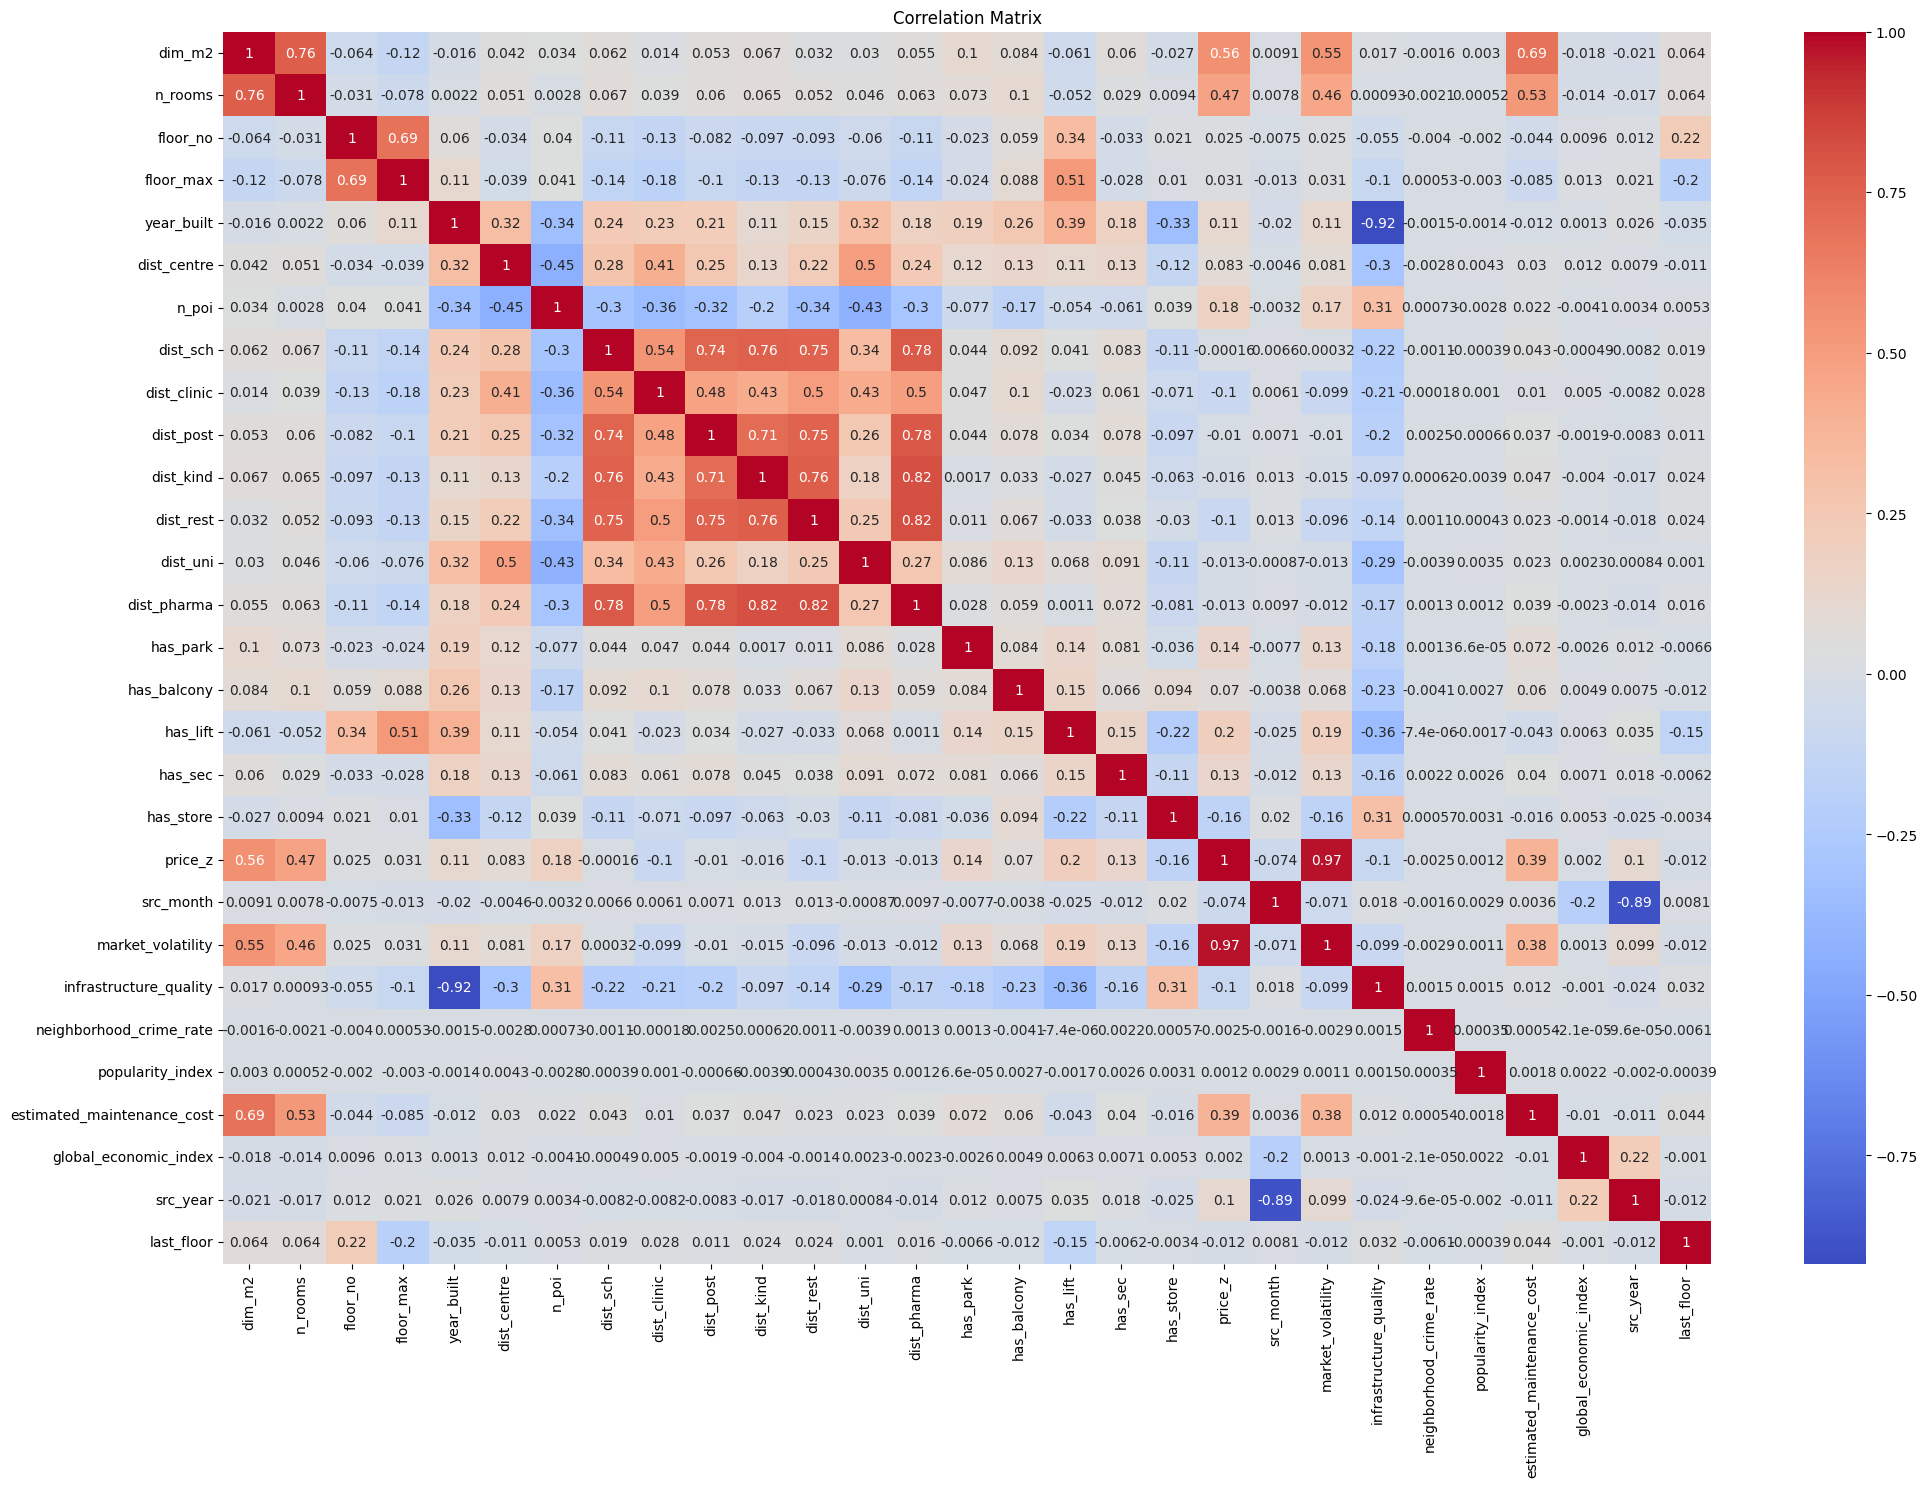

In [31]:
corr_columns = df.drop(columns = ['obj_type','loc_code', 'own_type'])

plt.figure(figsize=(24, 16))
sns.heatmap(corr_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

I notice that some variables are highly and weakly correlated. I won't delete them - in next steps I will apply regularisations (f.e. Lasso) which will cover that problem

In [32]:
df.head()

,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,dist_kind,dist_rest,dist_uni,dist_pharma,own_type,has_park,has_balcony,has_lift,has_sec,has_store,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,estimated_maintenance_cost,global_economic_index,src_year,last_floor
a3a463617a5c0439,0d6c4dfc,45.89,2.0,1.0,4.0,1999.0,13.496,11.0,0.541,0.878,0.438,0.134,0.539,2.243,0.168,12631efb,1,1,1,0,1,519626.21,9,693f303c,501710.76,14.02,95.39,44.51,13.99,100.291946,2023,0
23a92531fcb238b4,0c238f18,27.64,1.0,1.0,2.0,1940.0,2.440,16.0,0.377,0.979,0.062,0.248,0.151,2.004,0.160,12631efb,1,1,0,0,0,162959.26,4,8d5a4f0c,147763.87,110.55,46.17,56.25,7.59,91.315644,2024,0
d158671401f9fc34,0d6c4dfc,62.18,2.0,1.0,2.0,2000.0,10.284,8.0,0.391,1.242,0.563,0.266,0.433,2.067,0.575,12631efb,0,1,0,0,1,1167571.51,10,693f303c,1042847.59,31.15,18.94,50.36,21.14,93.681619,2023,0
280aced4655b7a96,2a6d5c01,53.68,2.0,2.0,4.0,2018.0,10.589,30.0,0.729,1.911,0.045,0.187,0.240,2.648,0.147,12631efb,1,0,1,0,0,907071.16,1,693f303c,728839.39,7.52,11.84,46.69,7.91,94.192062,2024,0
2315fa621e746fe4,2a6d5c01,70.89,3.0,2.0,3.0,2015.0,8.305,7.0,1.226,1.974,1.390,0.502,0.088,1.043,0.031,12631efb,1,1,1,0,0,1080383.19,11,693f303c,1263171.15,11.20,89.64,45.60,8.63,96.166051,2023,0


### Target variable analysis

In [33]:
df.price_z.mean().round(2)

784808.03

In [34]:
df.price_z.median().round(2)

690193.49

In [35]:
df.price_z.mode()

0       182883.11
1       248780.89
2       284816.47
3       284993.36
4       291182.62
          ...    
118     969280.24
119     975660.06
120    1053076.56
121    1063487.70
122    1242076.99
Name: price_z, Length: 123, dtype: float64

In [36]:
[{i: round(df.price_z.quantile(i), 2)} for i in np.arange(0, 1.1, 0.1)]

[{0.0: 119636.88},
 {0.1: 360659.34},
 {0.2: 459832.56},
 {0.30000000000000004: 541159.67},
 {0.4: 615223.11},
 {0.5: 690193.49},
 {0.6000000000000001: 772831.9},
 {0.7000000000000001: 877841.59},
 {0.8: 1028955.61},
 {0.9: 1314827.98},
 {1.0: 3921744.77}]

In [37]:
df.price_z.var().round(2)

185042317115.56

In [38]:
df.price_z.std().round(2)

430165.45

In [39]:
df.price_z.mean().round(2)

784808.03

In [40]:
df.price_z.skew().round(2)

1.84

In [41]:
df.price_z.kurtosis().round(2)

5.2

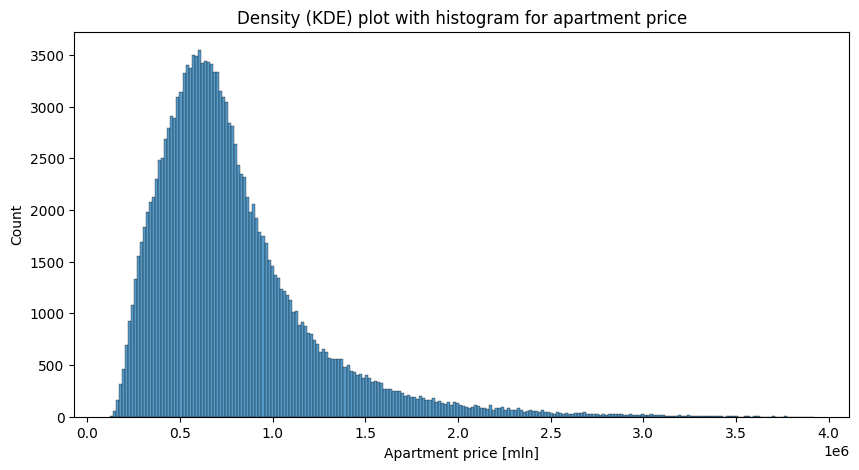

In [73]:
plt.figure(figsize=(10, 5))
sns.histplot(df.price_z).set(title="Density (KDE) plot with histogram for apartment price")
plt.xlabel('Apartment price [mln]')
plt.show()

From statistics and chart I notice, that apartment price distribution is really skewed. I'll try to log it

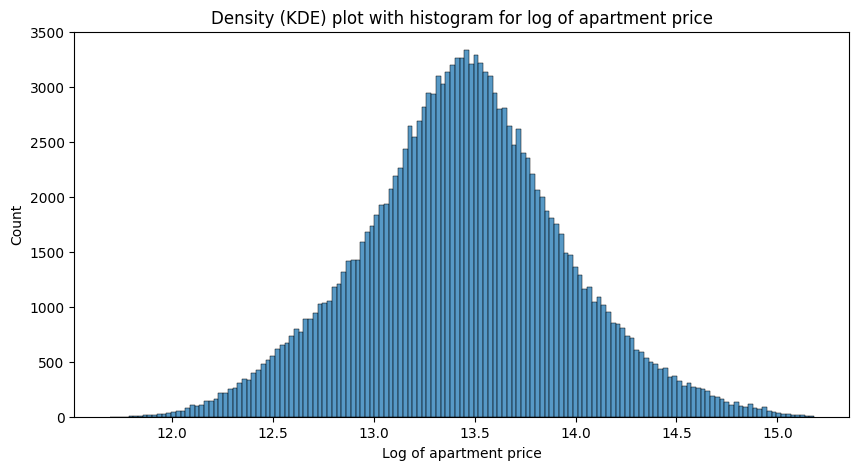

In [75]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log(df.price_z)).set(title="Density (KDE) plot with histogram for log of apartment price")
plt.xlabel('Log of apartment price')
plt.show()

Much better! gonna make new variable - log of price

In [71]:
df['log_price'] = np.log(df['price_z'])

df.log_price.mean().round(2)

13.45

In [68]:
df.log_price.median().round(2)

13.44

In [67]:
df.log_price.std().round(2)

0.5

In [69]:
df.log_price.skew().round(2)

0.06

In [70]:
df.log_price.kurtosis().round(2)

0.12

/var/folders/fq/6pwh8dhn12s2vc5_6nyn5t2c0000gn/T/ipykernel_87242/3105219057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


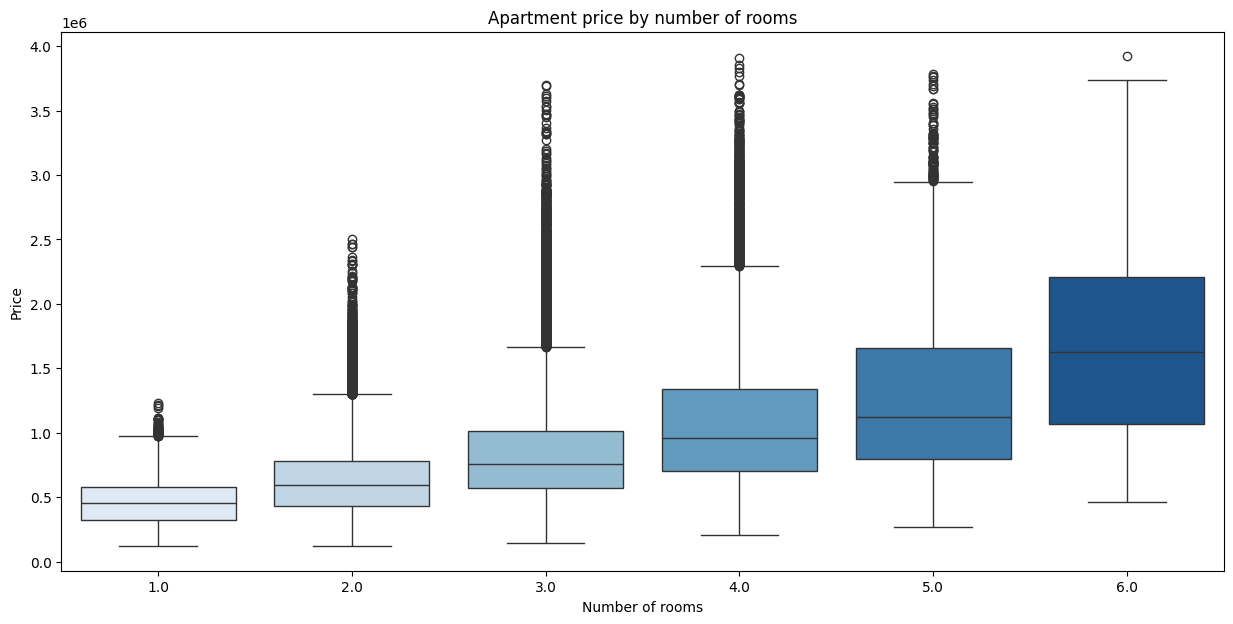

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 7))
sns.boxplot(
    x=df.n_rooms, 
    y=df.price_z, 
    palette="Blues"  # You can try other palettes like "husl", "Paired", or define your own
).set(title="Apartment price by number of rooms")

plt.xlabel("Number of rooms")
plt.ylabel("Price")
plt.show()

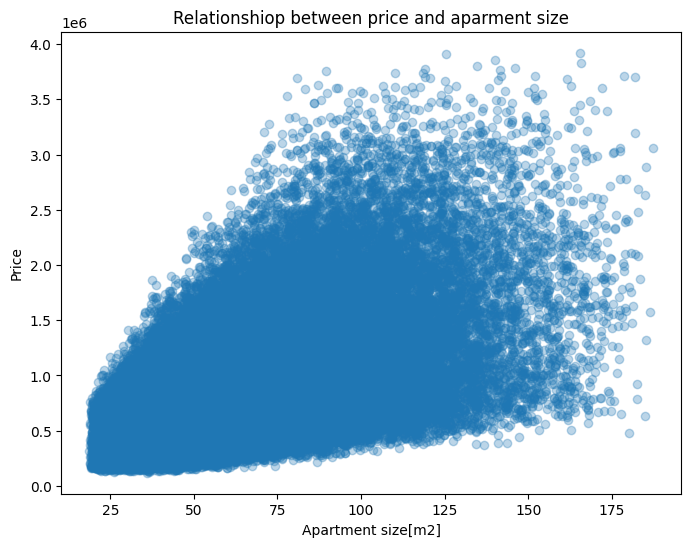

In [46]:

plt.figure(figsize=(8, 6))
plt.scatter(df['dim_m2'], df['price_z'], alpha=0.3)
plt.xlabel('Apartment size[m2]')
plt.ylabel('Price')
plt.title('Relationshiop between price and aparment size')
plt.show()


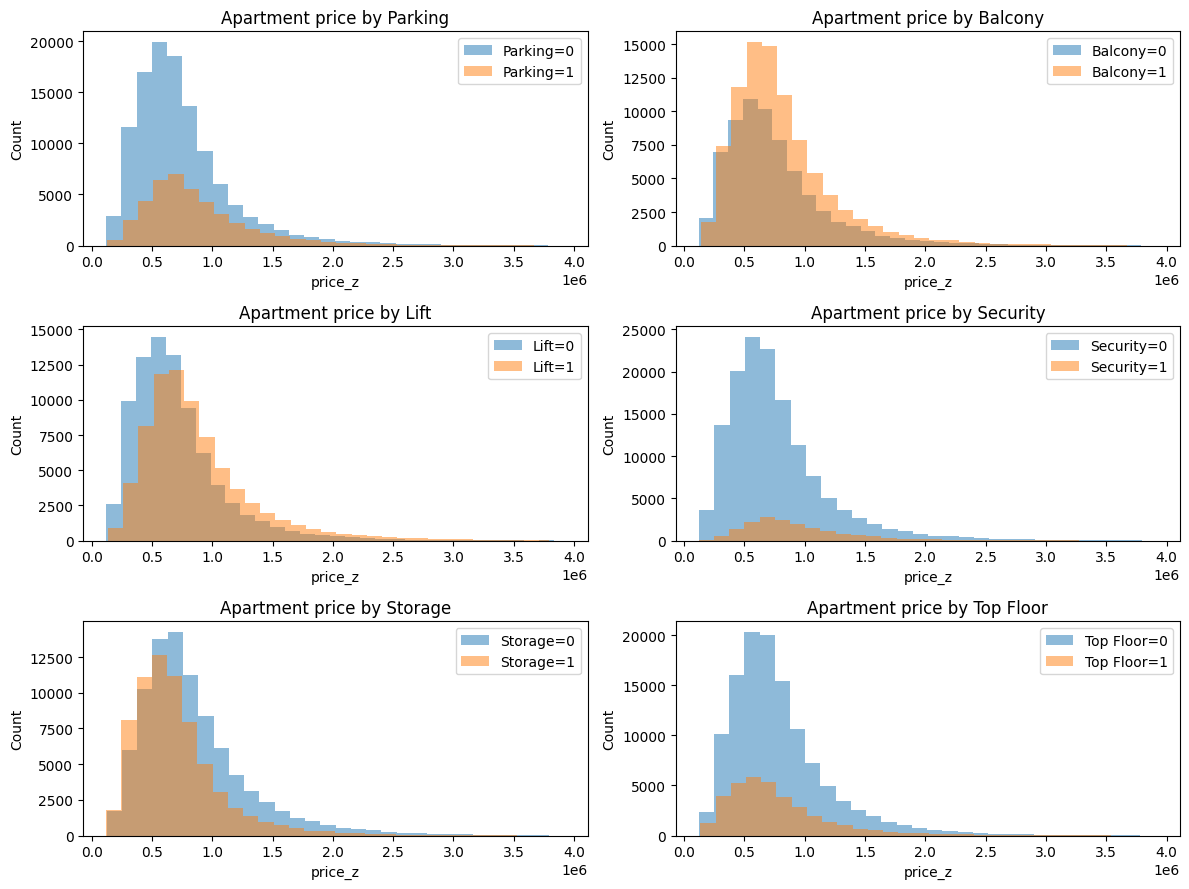

In [47]:
bin_columns = ['has_park', 'has_balcony', 'has_lift', 'has_sec', 'has_store', 'last_floor']

pretty_names = {
    'has_park': 'Parking',
    'has_balcony': 'Balcony',
    'has_lift': 'Lift',
    'has_sec': 'Security',
    'has_store': 'Storage',
    'last_floor': 'Top Floor'
}

n_cols = 2
n_rows = (len(bin_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

for idx, col in enumerate(bin_columns):
    ax = axes.flatten()[idx]
    df[df[col] == 0]['price_z'].plot.hist(
        bins=30, alpha=0.5, ax=ax, label=f'{pretty_names[col]}=0'
    )
    df[df[col] == 1]['price_z'].plot.hist(
        bins=30, alpha=0.5, ax=ax, label=f'{pretty_names[col]}=1'
    )
    ax.set_title(f"Apartment price by {pretty_names[col]}")
    ax.set_xlabel('price_z')
    ax.set_ylabel('Count')
    ax.legend()

# Hide unused axes if number of plots is odd
for i in range(len(bin_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


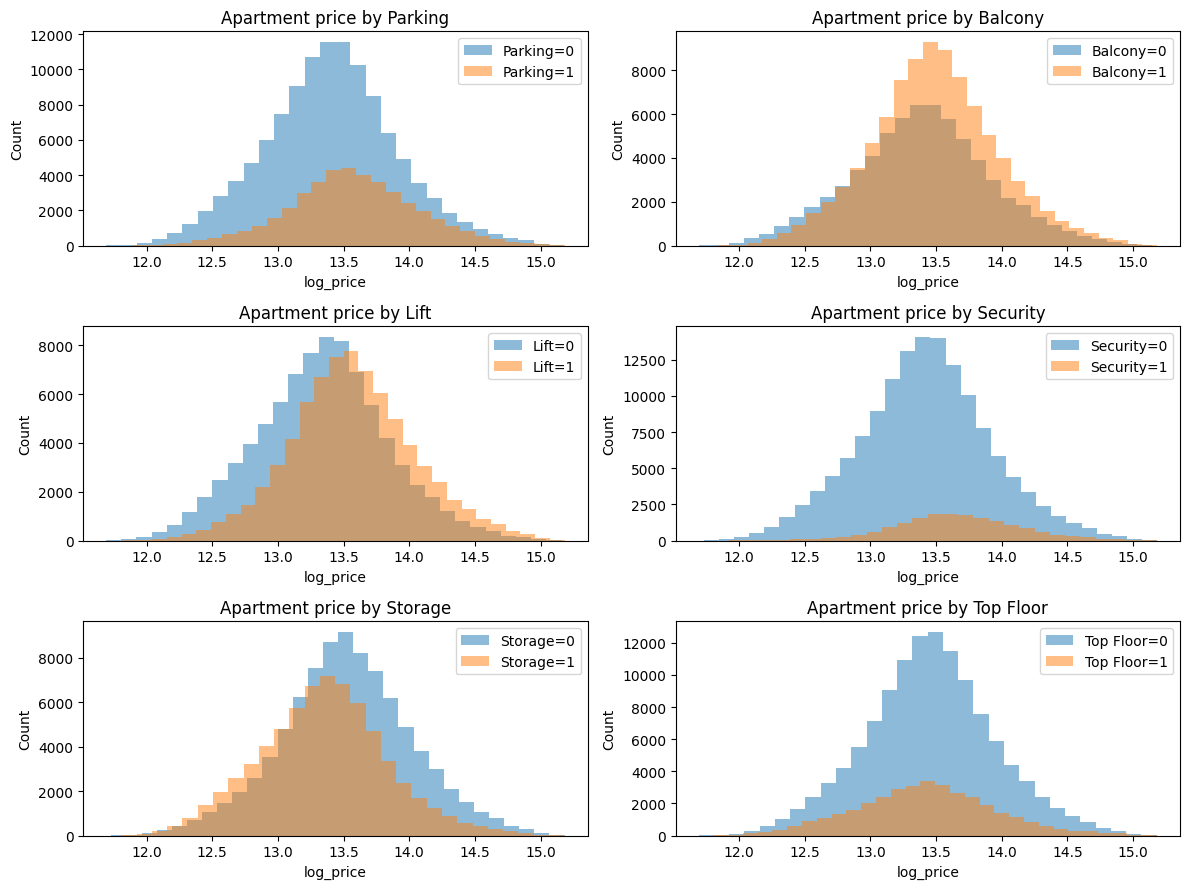

In [48]:
bin_columns = ['has_park', 'has_balcony', 'has_lift', 'has_sec', 'has_store', 'last_floor']

pretty_names = {
    'has_park': 'Parking',
    'has_balcony': 'Balcony',
    'has_lift': 'Lift',
    'has_sec': 'Security',
    'has_store': 'Storage',
    'last_floor': 'Top Floor'
}

n_cols = 2
n_rows = (len(bin_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

for idx, col in enumerate(bin_columns):
    ax = axes.flatten()[idx]
    df[df[col] == 0]['log_price'].plot.hist(
        bins=30, alpha=0.5, ax=ax, label=f'{pretty_names[col]}=0'
    )
    df[df[col] == 1]['log_price'].plot.hist(
        bins=30, alpha=0.5, ax=ax, label=f'{pretty_names[col]}=1'
    )
    ax.set_title(f"Apartment price by {pretty_names[col]}")
    ax.set_xlabel('log_price')
    ax.set_ylabel('Count')
    ax.legend()

# Hide unused axes if number of plots is odd
for i in range(len(bin_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


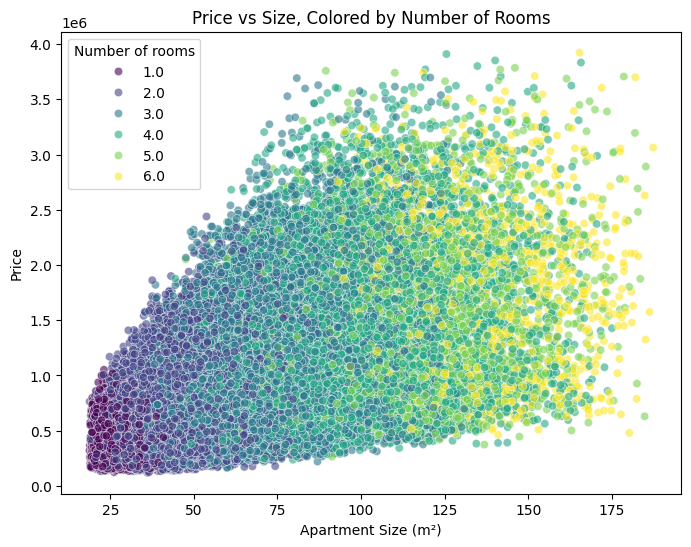

In [49]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='dim_m2', y='price_z', hue='n_rooms', palette='viridis', alpha=0.6)
plt.xlabel('Apartment Size (m²)')
plt.ylabel('Price')
plt.title('Price vs Size, Colored by Number of Rooms')
plt.legend(title='Number of rooms')
plt.show()


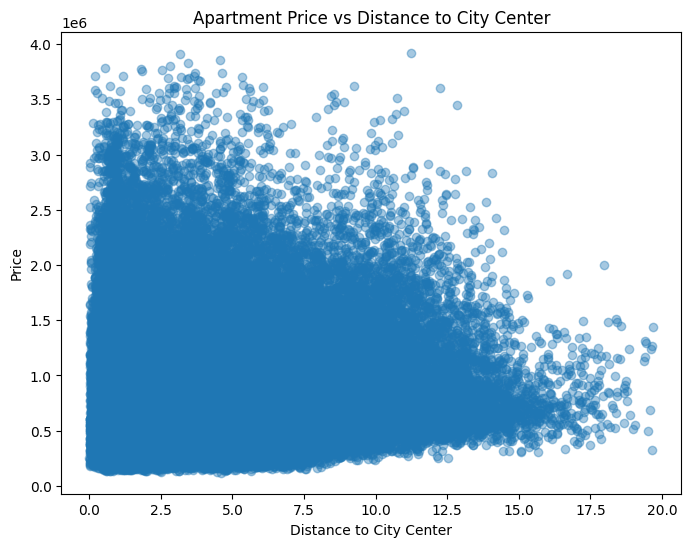

In [50]:

plt.figure(figsize=(8, 6))
plt.scatter(df['dist_centre'], df['price_z'], alpha=0.4)
plt.xlabel('Distance to City Center')
plt.ylabel('Price')
plt.title('Apartment Price vs Distance to City Center')
plt.show()


## Distribution of other variables

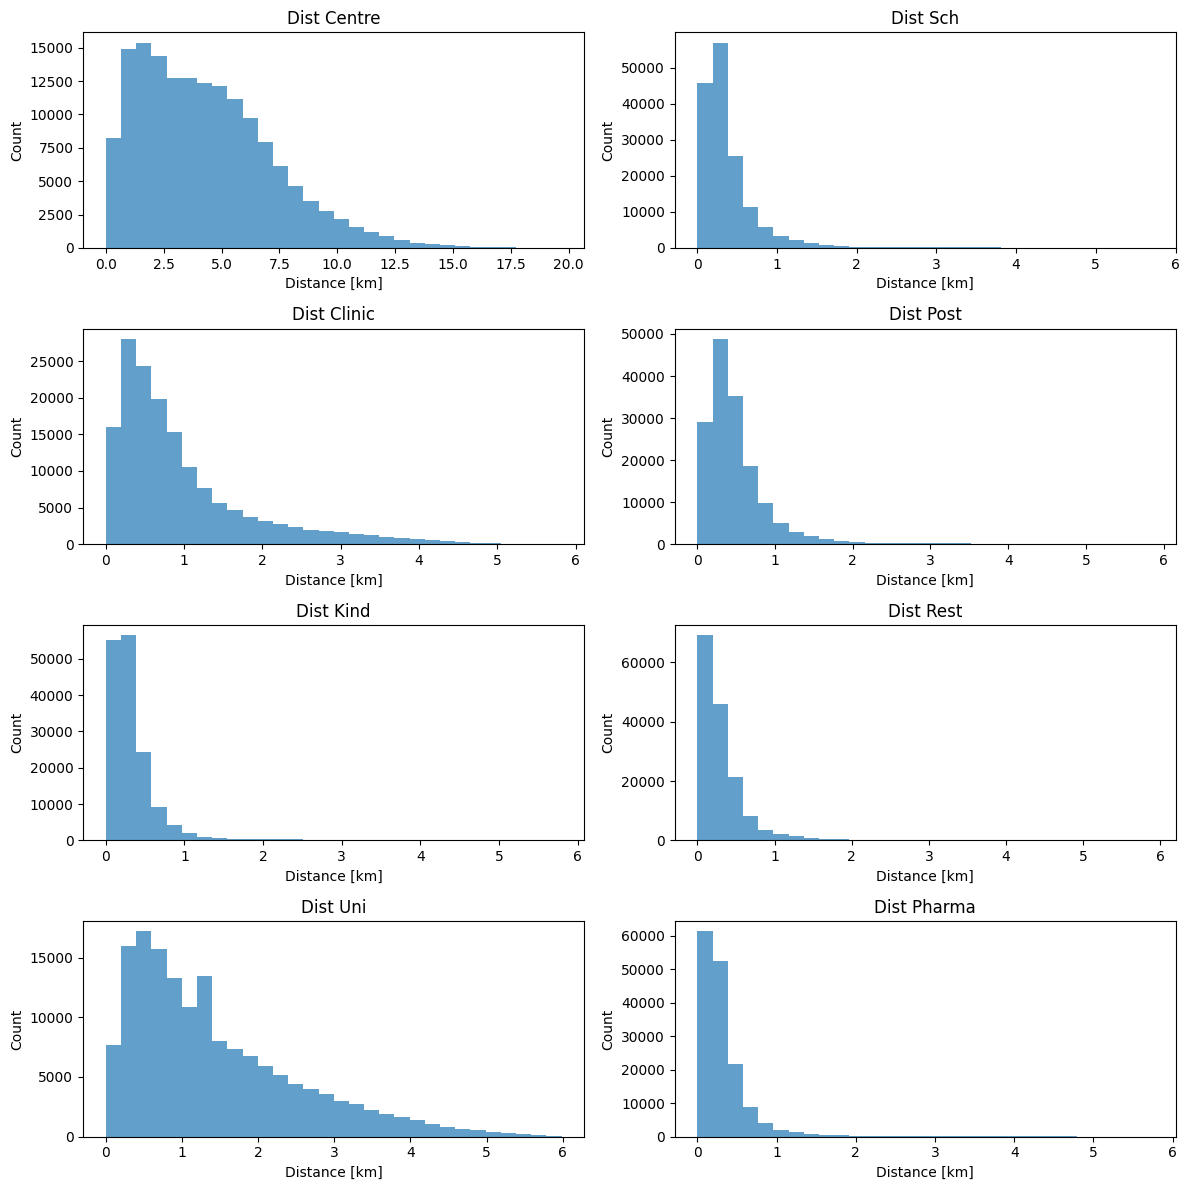

In [83]:
distance_columns = [
    'dist_centre', 'dist_sch', 'dist_clinic', 'dist_post',
    'dist_kind', 'dist_rest', 'dist_uni', 'dist_pharma'
]

n_cols = 2
n_rows = (len(distance_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

for idx, col in enumerate(distance_columns):
    ax = axes.flatten()[idx]
    df[col].plot.hist(bins=30, alpha=0.7, ax=ax)
    ax.set_title(col.replace('_', ' ').title())
    ax.set_xlabel('Distance [km]')
    ax.set_ylabel('Count')

# Hide unused axes if number of plots is odd
for i in range(len(distance_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


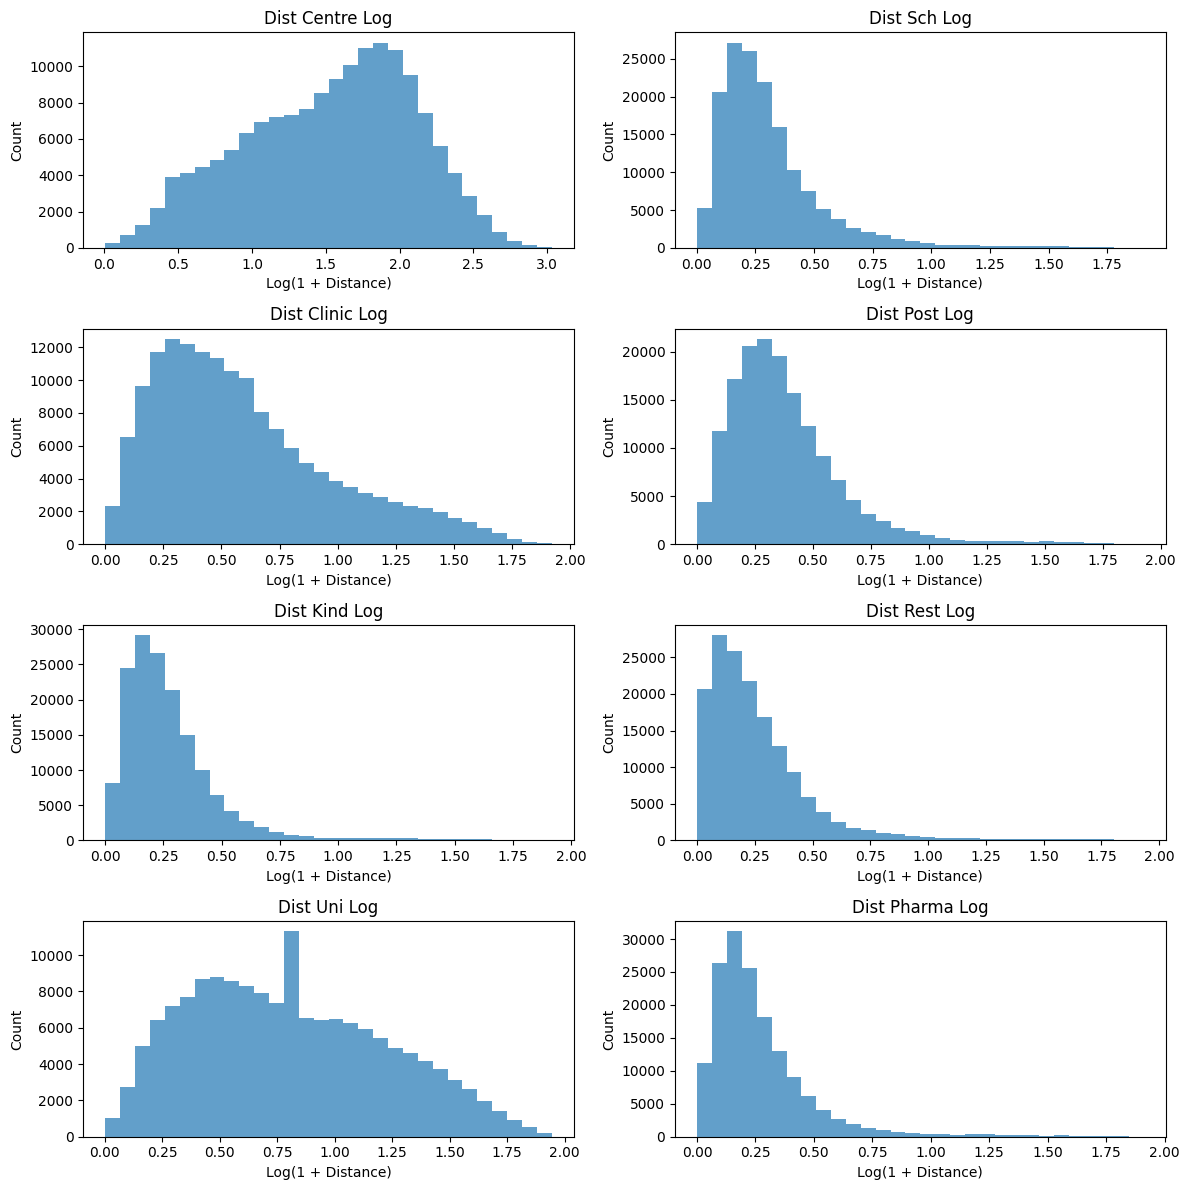

In [52]:
# turning them into logs and then seeing distribution
distance_columns = [
    'dist_centre', 'dist_sch', 'dist_clinic', 'dist_post',
    'dist_kind', 'dist_rest', 'dist_uni', 'dist_pharma'
]

for col in distance_columns:
    df[col + '_log'] = np.log1p(df[col])

distance_log_columns = [
    'dist_centre_log',
    'dist_sch_log',
    'dist_clinic_log',
    'dist_post_log',
    'dist_kind_log',
    'dist_rest_log',
    'dist_uni_log',
    'dist_pharma_log'
]

n_cols = 2
n_rows = (len(distance_log_columns) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))

for idx, col in enumerate(distance_log_columns):
    ax = axes.flatten()[idx]
    df[col].plot.hist(bins=30, alpha=0.7, ax=ax)
    ax.set_title(col.replace('_', ' ').title())
    ax.set_xlabel('Log(1 + Distance)')
    ax.set_ylabel('Count')

# Hide unused axes if number of plots is odd
for i in range(len(distance_log_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


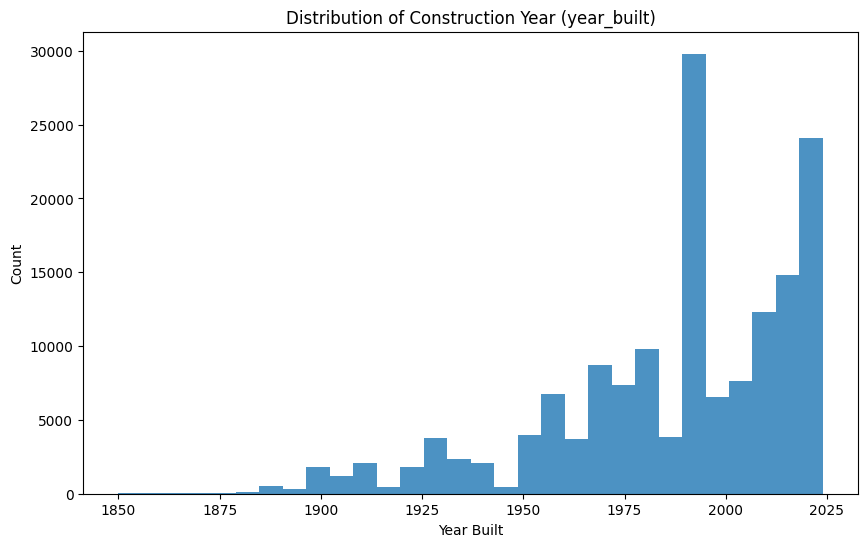

In [53]:
plt.figure(figsize=(10, 6))
df['year_built'].plot.hist(bins=30, alpha=0.8)
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.title('Distribution of Construction Year (year_built)')
plt.show()

In [54]:
# turing year into categorical and one hot encoding. Droppinh first to omit collinearity

bins = [0, 1900, 1920, 1940, 1950, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = [
    'before_1900', '1900_1920', '1920_1940', '1940_1950', '1950_1970',
    '1970_1980', '1980_1990', '1990_2000', '2000_2010', '2010_2020', 'after_2020'
]

df['year_built_cat'] = pd.cut(df['year_built'], bins=bins, labels=labels, right=False)

df = pd.get_dummies(df, columns=['year_built_cat'], prefix='', prefix_sep='', drop_first=True)

df.head()


,obj_type,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,dist_kind,dist_rest,dist_uni,dist_pharma,own_type,has_park,has_balcony,has_lift,has_sec,has_store,price_z,src_month,loc_code,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,estimated_maintenance_cost,global_economic_index,src_year,last_floor,log_price,dist_centre_log,dist_sch_log,dist_clinic_log,dist_post_log,dist_kind_log,dist_rest_log,dist_uni_log,dist_pharma_log,1900_1920,1920_1940,1940_1950,1950_1970,1970_1980,1980_1990,1990_2000,2000_2010,2010_2020,after_2020
a3a463617a5c0439,0d6c4dfc,45.89,2.0,1.0,4.0,1999.0,13.496,11.0,0.541,0.878,0.438,0.134,0.539,2.243,0.168,12631efb,1,1,1,0,1,519626.21,9,693f303c,501710.76,14.02,95.39,44.51,13.99,100.291946,2023,0,13.160865,2.673873,0.432432,0.630207,0.363253,0.125751,0.431133,1.176499,0.155293,False,False,False,False,False,False,True,False,False,False
23a92531fcb238b4,0c238f18,27.64,1.0,1.0,2.0,1940.0,2.440,16.0,0.377,0.979,0.062,0.248,0.151,2.004,0.160,12631efb,1,1,0,0,0,162959.26,4,8d5a4f0c,147763.87,110.55,46.17,56.25,7.59,91.315644,2024,0,12.001256,1.235471,0.319907,0.682592,0.060154,0.221542,0.140631,1.099945,0.148420,False,False,True,False,False,False,False,False,False,False
d158671401f9fc34,0d6c4dfc,62.18,2.0,1.0,2.0,2000.0,10.284,8.0,0.391,1.242,0.563,0.266,0.433,2.067,0.575,12631efb,0,1,0,0,1,1167571.51,10,693f303c,1042847.59,31.15,18.94,50.36,21.14,93.681619,2023,0,13.970437,2.423386,0.330023,0.807368,0.446607,0.235862,0.359770,1.120700,0.454255,False,False,False,False,False,False,False,True,False,False
280aced4655b7a96,2a6d5c01,53.68,2.0,2.0,4.0,2018.0,10.589,30.0,0.729,1.911,0.045,0.187,0.240,2.648,0.147,12631efb,1,0,1,0,0,907071.16,1,693f303c,728839.39,7.52,11.84,46.69,7.91,94.192062,2024,0,13.717976,2.450056,0.547543,1.068497,0.044017,0.171429,0.215111,1.294179,0.137150,False,False,False,False,False,False,False,False,True,False
2315fa621e746fe4,2a6d5c01,70.89,3.0,2.0,3.0,2015.0,8.305,7.0,1.226,1.974,1.390,0.502,0.088,1.043,0.031,12631efb,1,1,1,0,0,1080383.19,11,693f303c,1263171.15,11.20,89.64,45.60,8.63,96.166051,2023,0,13.892826,2.230552,0.800206,1.089908,0.871293,0.406798,0.084341,0.714419,0.030529,False,False,False,False,False,False,False,False,True,False


/var/folders/fq/6pwh8dhn12s2vc5_6nyn5t2c0000gn/T/ipykernel_87242/4079674206.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_built_cat', order=labels, palette="Blues")


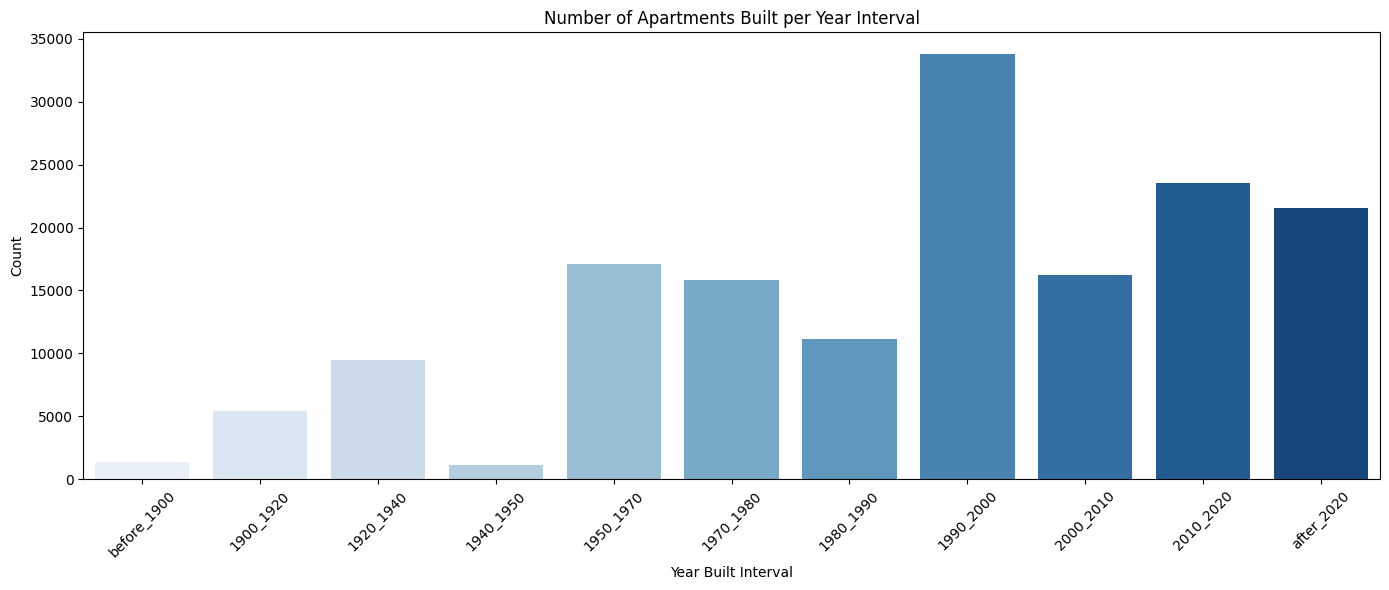

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, re-create the categorical column if it's already been one-hot encoded
bins = [0, 1900, 1920, 1940, 1950, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = [
    'before_1900', '1900_1920', '1920_1940', '1940_1950', '1950_1970',
    '1970_1980', '1980_1990', '1990_2000', '2000_2010', '2010_2020', 'after_2020'
]

df['year_built_cat'] = pd.cut(df['year_built'], bins=bins, labels=labels, right=False)

# Now plot
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='year_built_cat', order=labels, palette="Blues")

plt.title("Number of Apartments Built per Year Interval")
plt.xlabel("Year Built Interval")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
# turing obj_type into dummies - only 4 options

df = pd.get_dummies(df, columns=['obj_type'], prefix='obj_type', drop_first=True)

# similar for own_type
df = pd.get_dummies(df, columns=['own_type'], prefix='own_type', drop_first=True)

# and finally for loc_code
df = pd.get_dummies(df, columns=['loc_code'], prefix='loc_code', drop_first=True)

# and for src_year, why not
df = pd.get_dummies(df, columns=['src_year'], prefix='src_year', drop_first=True)

In [56]:
df.head()

,dim_m2,n_rooms,floor_no,floor_max,year_built,dist_centre,n_poi,dist_sch,dist_clinic,dist_post,dist_kind,dist_rest,dist_uni,dist_pharma,has_park,has_balcony,has_lift,has_sec,has_store,price_z,src_month,market_volatility,infrastructure_quality,neighborhood_crime_rate,popularity_index,estimated_maintenance_cost,global_economic_index,last_floor,log_price,dist_centre_log,dist_sch_log,dist_clinic_log,dist_post_log,dist_kind_log,dist_rest_log,dist_uni_log,dist_pharma_log,1900_1920,1920_1940,1940_1950,1950_1970,1970_1980,1980_1990,1990_2000,2000_2010,2010_2020,after_2020,obj_type_0d6c4dfc,obj_type_2a6d5c01,obj_type_other,own_type_4e625087,own_type_bfb8fe10,loc_code_143768f7,loc_code_378f340c,loc_code_3cb4aaff,loc_code_533f6886,loc_code_570cb745,loc_code_64a58667,loc_code_6900ba06,loc_code_693f303c,loc_code_765f79ed,loc_code_81b10147,loc_code_8d5a4f0c,loc_code_a6d54bd1,loc_code_e0cff11b,loc_code_ece39f3d,src_year_2024
a3a463617a5c0439,45.89,2.0,1.0,4.0,1999.0,13.496,11.0,0.541,0.878,0.438,0.134,0.539,2.243,0.168,1,1,1,0,1,519626.21,9,501710.76,14.02,95.39,44.51,13.99,100.291946,0,13.160865,2.673873,0.432432,0.630207,0.363253,0.125751,0.431133,1.176499,0.155293,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
23a92531fcb238b4,27.64,1.0,1.0,2.0,1940.0,2.440,16.0,0.377,0.979,0.062,0.248,0.151,2.004,0.160,1,1,0,0,0,162959.26,4,147763.87,110.55,46.17,56.25,7.59,91.315644,0,12.001256,1.235471,0.319907,0.682592,0.060154,0.221542,0.140631,1.099945,0.148420,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
d158671401f9fc34,62.18,2.0,1.0,2.0,2000.0,10.284,8.0,0.391,1.242,0.563,0.266,0.433,2.067,0.575,0,1,0,0,1,1167571.51,10,1042847.59,31.15,18.94,50.36,21.14,93.681619,0,13.970437,2.423386,0.330023,0.807368,0.446607,0.235862,0.359770,1.120700,0.454255,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
280aced4655b7a96,53.68,2.0,2.0,4.0,2018.0,10.589,30.0,0.729,1.911,0.045,0.187,0.240,2.648,0.147,1,0,1,0,0,907071.16,1,728839.39,7.52,11.84,46.69,7.91,94.192062,0,13.717976,2.450056,0.547543,1.068497,0.044017,0.171429,0.215111,1.294179,0.137150,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
2315fa621e746fe4,70.89,3.0,2.0,3.0,2015.0,8.305,7.0,1.226,1.974,1.390,0.502,0.088,1.043,0.031,1,1,1,0,0,1080383.19,11,1263171.15,11.20,89.64,45.60,8.63,96.166051,0,13.892826,2.230552,0.800206,1.089908,0.871293,0.406798,0.084341,0.714419,0.030529,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


## Saving final dataframes

In [57]:
from sklearn.model_selection import train_test_split

df_final = df
#df_final.to_csv("final_test.csv")
#df_train, df_test = train_test_split(df_final, test_size=0.2, random_state=42)

#df_train.to_csv("train.csv")
#df_test.to_csv("test.csv")

